In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as plt
from datetime import datetime as dt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("Docstat_Order_Attempt_LevelData_final.csv")
store_df = df.copy()
df.head()

,order_id,case_id,order_placed_at,delivery_pincode,order_source,is_add_to_cart,is_courier,supplier_city_name,user_type_monthly,chronic_flag_old,...,task_assigned_at,task_actioned_at,task_action,reject_reason,next_task_assigned_at,call_initiated_flag,call_answered_flag,success_flag,attempt_number,attempt_number_last
0,13212626,2894223,2019-11-01 01:29:23,452010,Android_App,True,True,Ahmedabad,New User,1,...,2019-11-01 10:37:00,2019-11-01 10:38:57,Rx Prescribed,NaN,NaN,1,1,1,1,1
1,13212644,2894234,2019-11-01 01:34:32,786125,Android_App,True,True,Kolkata,New User,0,...,2019-11-01 12:10:46,2019-11-01 12:14:38,Rx Prescribed,NaN,NaN,1,1,1,2,1
2,13212644,2894234,2019-11-01 01:34:32,786125,Android_App,True,True,Kolkata,New User,0,...,2019-11-01 10:37:31,2019-11-01 10:39:42,Hold,Patient did not pick up,2019-11-01 12:10:46,1,0,0,1,2
3,13212731,2894266,2019-11-01 02:05:20,410502,Android_App,True,True,Mumbai,Placed_but_not_fulfilled,1,...,2019-11-01 10:39:13,2019-11-01 10:40:55,Rx Prescribed,NaN,NaN,1,1,1,1,1
4,13212854,2894374,2019-11-01 03:50:28,201001,Mobile_Website,True,False,Gurgaon,New User,0,...,2019-11-01 12:11:40,2019-11-01 12:12:53,Rx Prescribed,NaN,NaN,1,1,1,2,1


In [4]:
#df.count()

In [315]:
#store_df['attempt_number'].value_counts()

In [3]:
df['task_assigned_at'] = pd.to_datetime(df['task_assigned_at'])
df['task_assigned_hour'] = df.task_assigned_at.dt.hour
df=df[df['attempt_number']>=2]
#df['attempt_number'].value_counts()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248122 entries, 1 to 655925
Data columns (total 32 columns):
order_id                        248122 non-null int64
case_id                         248122 non-null int64
order_placed_at                 248122 non-null object
delivery_pincode                248122 non-null int64
order_source                    248122 non-null object
is_add_to_cart                  248122 non-null bool
is_courier                      248122 non-null bool
supplier_city_name              248122 non-null object
user_type_monthly               248122 non-null object
chronic_flag_old                248122 non-null int64
customer_type                   248122 non-null object
successful_consultation_type    248122 non-null object
first_moved_to_dp_at            248122 non-null object
instances_moved_to_dp           248122 non-null int64
num_of_doc_attempts             248122 non-null int64
num_of_times_on_hold            248122 non-null int64
dp_order_source     

In [4]:
def prob_table(df, row, col='task_assigned_hour') :
    
    temp = df.pivot_table(index=row, columns='task_assigned_hour', values='success_flag', aggfunc='mean')
    temp.fillna(0,inplace=True)
    temp = temp.replace(to_replace=0.0, value =0.2)
    temp = temp.replace(to_replace=1.0, value =0.5)
    temp.index = temp.index.map(str)
    
    return temp #.drop(row,axis=1)

In [5]:
prob_dict = {}
    
prob_dict.update(is_add_to_cart=prob_table(df, 'is_add_to_cart'))
prob_dict.update(is_courier=prob_table(df, 'is_courier'))
prob_dict.update(supplier_city_name=prob_table(df, 'supplier_city_name'))
prob_dict.update(order_source=prob_table(df, 'order_source'))
prob_dict.update(user_type_monthly=prob_table(df, 'user_type_monthly'))
prob_dict.update(chronic_flag_old=prob_table(df, 'chronic_flag_old'))
prob_dict.update(customer_type=prob_table(df, 'customer_type'))
prob_dict.update(attempt_number=prob_table(df, 'attempt_number'))
prob_dict.update(successful_consultation_type=prob_table(df, 'successful_consultation_type'))
prob_dict.update(dp_order_source=prob_table(df, 'dp_order_source'))

In [6]:
#prob_dict_df = pd.DataFrame.from_dict(prob_dict, orient="index")

In [8]:
#['prob_is_add_to_cart', 'prob_is_courier', 'prob_supplier_city_name', 'prob_order_source', 'prob_user_type_monthly', 'prob_chronic_flag_old', 'prob_customer_type', 'prob_attempt_number', 'prob_successful_consultation_type', 'prob_dp_order_source']

In [23]:
df.pivot_table(index='attempt_number', values='success_flag', aggfunc='mean') #columns='task_assigned_hour',

,success_flag
attempt_number,
2,0.524134
3,0.454757
4,0.374577
5,0.295421
6,0.239716
7,0.301913
8,0.315928
9,0.350282
10,0.367647


In [10]:
prob_dict['attempt_number']
#['prob_is_add_to_cart', 'prob_is_courier', 'prob_supplier_city_name', 'prob_order_source', 'prob_user_type_monthly', 'prob_chronic_flag_old', 'prob_customer_type', 'prob_attempt_number', 'prob_successful_consultation_type', 'prob_dp_order_source']
#df.pivot_table(index='is_courier', columns='task_assigned_hour', values='success_flag', aggfunc='mean')

task_assigned_hour,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
attempt_number,,,,,,,,,,,,,,,,
2,0.514751,0.544616,0.534327,0.532773,0.371643,0.360617,0.546504,0.554705,0.536062,0.553179,0.564031,0.576186,0.592113,0.578204,0.533623,0.75
3,0.385666,0.492163,0.443051,0.452644,0.498188,0.497960,0.498826,0.458397,0.422469,0.430278,0.453501,0.448000,0.432953,0.411281,0.388098,0.20
4,0.367521,0.420213,0.383971,0.366153,0.454829,0.422535,0.394148,0.393391,0.358341,0.384340,0.376486,0.363810,0.339227,0.341219,0.271198,0.20
5,0.313433,0.354839,0.298469,0.286581,0.326347,0.379157,0.329685,0.293495,0.293866,0.314910,0.301126,0.278117,0.267355,0.253205,0.223005,0.20
6,0.225000,0.469388,0.280335,0.234991,0.293634,0.351562,0.275154,0.223782,0.222793,0.231598,0.252682,0.255585,0.220403,0.213729,0.190551,0.20
7,0.409836,0.371134,0.429412,0.364929,0.424658,0.299618,0.343662,0.294776,0.245645,0.263682,0.262868,0.322000,0.240084,0.320261,0.336449,0.20
8,0.240000,0.375000,0.468750,0.421053,0.500000,0.284211,0.320988,0.360465,0.323699,0.236994,0.338983,0.237288,0.271429,0.346939,0.257143,0.20
9,0.333333,0.400000,0.423077,0.428571,0.483871,0.282609,0.348485,0.300000,0.375000,0.285714,0.372881,0.314815,0.293103,0.342105,0.500000,0.20
10,0.200000,0.333333,0.428571,0.500000,0.461538,0.416667,0.285714,0.500000,0.583333,0.200000,0.363636,0.285714,0.388889,0.166667,0.200000,0.20


In [42]:
testing_df = pd.read_csv("Docstat_Order_Attempt_LevelData_final_test.csv")
store_testing_df = testing_df.copy()

In [67]:
testing_df=testing_df[testing_df['attempt_number']>=2]

testing_df['task_assigned_at'] = pd.to_datetime(testing_df['task_assigned_at'])
testing_df['task_assigned_date'] = testing_df['task_assigned_at'].dt.date
testing_df['task_assigned_hour'] = testing_df.task_assigned_at.dt.hour

testing_df['attempt_number_og'] = testing_df['attempt_number']
testing_df.loc[testing_df.attempt_number>=7,'attempt_number']=6

In [55]:
testing_df = df.copy()

In [56]:
testing_df['attempt_number_og'] = testing_df['attempt_number']
testing_df.loc[testing_df.attempt_number>=7,'attempt_number']=6
testing_df['task_assigned_date'] = testing_df['task_assigned_at'].dt.date

In [130]:
#testing_df['prob_atc'] = testing_df.lookup(test_df['is_add_to_cart'].astype(str), test_df['task_assigned_hour'])
#testing_df['supplier_city_name'].value_counts()
#prob_dict['is_add_to_cart']

In [57]:
def prob_values(testing_df, feature):
    
    testing_df['prob_'+feature] = prob_dict[feature].lookup(testing_df[feature].astype(str), testing_df['task_assigned_hour'])
    
    

In [58]:
prob_values(testing_df, 'is_add_to_cart')
prob_values(testing_df, 'is_courier')
prob_values(testing_df, 'supplier_city_name')
prob_values(testing_df, 'order_source')
prob_values(testing_df, 'user_type_monthly')
prob_values(testing_df, 'chronic_flag_old')
prob_values(testing_df, 'customer_type')
prob_values(testing_df, 'attempt_number')
prob_values(testing_df, 'successful_consultation_type')
prob_values(testing_df, 'dp_order_source')

In [22]:
#testing_df[['prob_is_add_to_cart', 'prob_is_courier', 'prob_supplier_city_name', 'prob_order_source', 'prob_user_type_monthly', 'prob_chronic_flag_old', 'prob_customer_type', 'prob_attempt_number', 'prob_successful_consultation_type', 'prob_dp_order_source']].values.prod(axis=1)

In [59]:
# prob_is_add_to_cart                  131063 non-null float64
# prob_is_courier                      131063 non-null float64
# prob_supplier_city_name              131063 non-null float64
# prob_order_source                    131063 non-null float64
# prob_user_type_monthly               131063 non-null float64
# prob_chronic_flag_old                131063 non-null float64
# prob_customer_type                   131063 non-null float64
# prob_attempt_number                  131063 non-null float64
# prob_successful_consultation_type    131063 non-null float64
# prob_dp_order_source 

testing_df['total_prob_score'] = testing_df[['prob_is_add_to_cart', 'prob_is_courier', 'prob_supplier_city_name', 'prob_order_source', 'prob_user_type_monthly', 'prob_chronic_flag_old', 'prob_customer_type', 'prob_attempt_number', 'prob_successful_consultation_type', 'prob_dp_order_source']].values.prod(axis=1)

In [60]:
#testing_df.info()
testing_df['percentil_60'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.4))
testing_df['percentil_50'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.5))
testing_df['percentil_40'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.6))
testing_df['percentil_30'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.7))
testing_df['percentil_20'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.8))
testing_df['percentil_10'] = testing_df.groupby(['task_assigned_date','task_assigned_hour'])['total_prob_score'].transform(lambda x: x.quantile(.9))


In [61]:
testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_60'],'pred_top_60_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_60'],'pred_top_60_success']=0

testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_50'],'pred_top_50_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_50'],'pred_top_50_success']=0

testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_40'],'pred_top_40_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_40'],'pred_top_40_success']=0

testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_30'],'pred_top_30_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_30'],'pred_top_30_success']=0

testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_20'],'pred_top_20_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_20'],'pred_top_20_success']=0

testing_df.loc[testing_df['total_prob_score']>=testing_df['percentil_10'],'pred_top_10_success']=1
testing_df.loc[testing_df['total_prob_score']<testing_df['percentil_10'],'pred_top_10_success']=0

In [62]:
testing_df.loc[testing_df['success_flag']==0,'tp_top_60_success']=0
testing_df.loc[testing_df['success_flag']==0,'tp_top_50_success']=0
testing_df.loc[testing_df['success_flag']==0,'tp_top_40_success']=0
testing_df.loc[testing_df['success_flag']==0,'tp_top_30_success']=0
testing_df.loc[testing_df['success_flag']==0,'tp_top_20_success']=0
testing_df.loc[testing_df['success_flag']==0,'tp_top_10_success']=0

testing_df.loc[(testing_df['pred_top_60_success']==1) & (testing_df['success_flag']==1),'tp_top_60_success']=1
testing_df.loc[testing_df['pred_top_60_success']==0,'tp_top_60_success']=0

testing_df.loc[(testing_df['pred_top_50_success']==1) & (testing_df['success_flag']==1),'tp_top_50_success']=1
testing_df.loc[testing_df['pred_top_50_success']==0,'tp_top_50_success']=0

testing_df.loc[(testing_df['pred_top_40_success']==1) & (testing_df['success_flag']==1),'tp_top_40_success']=1
testing_df.loc[testing_df['pred_top_40_success']==0,'tp_top_40_success']=0

testing_df.loc[(testing_df['pred_top_30_success']==1) & (testing_df['success_flag']==1),'tp_top_30_success']=1
testing_df.loc[testing_df['pred_top_30_success']==0,'tp_top_30_success']=0

testing_df.loc[(testing_df['pred_top_20_success']==1) & (testing_df['success_flag']==1),'tp_top_20_success']=1
testing_df.loc[testing_df['pred_top_20_success']==0,'tp_top_20_success']=0

testing_df.loc[(testing_df['pred_top_10_success']==1) & (testing_df['success_flag']==1),'tp_top_10_success']=1
testing_df.loc[testing_df['pred_top_10_success']==0,'tp_top_10_success']=0


In [63]:
testing_df.to_csv("Final_latest_train_check.csv")

In [39]:
testing_df.tp_top_60_success.isnull().any()

False

In [ ]:
dftest = testing_df[['prob_is_add_to_cart', 'prob_is_courier', 'prob_supplier_city_name', 'prob_order_source', 'prob_user_type_monthly', 'prob_chronic_flag_old', 'prob_customer_type', 'prob_attempt_number', 'prob_successful_consultation_type', 'prob_dp_order_source']]

In [66]:

df1 = dftest.iloc[:,0:3]
df1 = pd.concat([df1,testing_df['success_flag']],axis=1)

df2 = dftest.iloc[:,3:6]
df2 = pd.concat([df2,testing_df['success_flag']],axis=1)

df3 = dftest.iloc[:,6:10]
df3 = pd.concat([df3,testing_df['success_flag']],axis=1)


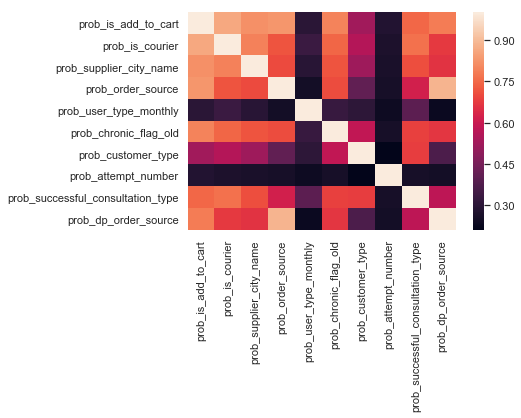

In [70]:
sns.heatmap(dftest.corr())

In [88]:
temp = df.pivot_table(index='task_assigned_hour', columns='is_add_to_cart', values='success_flag', aggfunc='mean')
temp.fillna(0,inplace=True)
temp.index = temp.index.map(str)

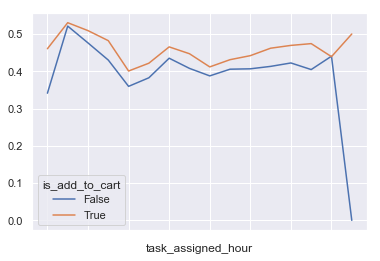

In [90]:
temp.plot()

In [91]:
temp = df.pivot_table(index='task_assigned_hour', columns='is_courier', values='success_flag', aggfunc='mean')
temp.fillna(0,inplace=True)
temp.index = temp.index.map(str)

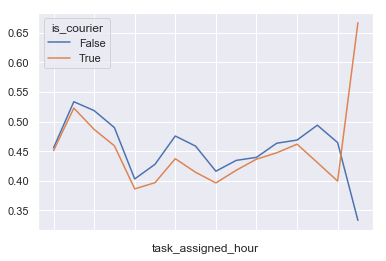

In [92]:
temp.plot()

In [93]:
temp = df.pivot_table(index='task_assigned_hour', columns='supplier_city_name', values='success_flag', aggfunc='mean')
temp.fillna(0,inplace=True)
temp.index = temp.index.map(str)

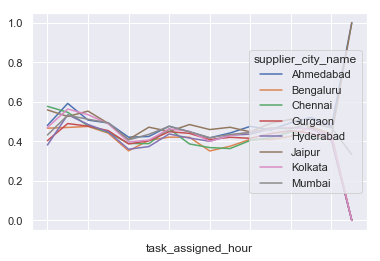

In [94]:
temp.plot()

In [96]:
temp = df.pivot_table(index='task_assigned_hour', columns='order_source', values='success_flag', aggfunc='mean')
temp.fillna(0,inplace=True)
temp.index = temp.index.map(str)

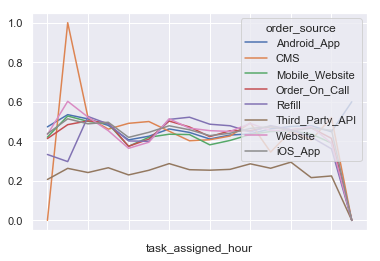

In [97]:
temp.plot()

In [88]:
temp = df.pivot_table(index='task_assigned_hour', columns='is_add_to_cart', values='success_flag', aggfunc='mean')
temp.fillna(0,inplace=True)
temp.index = temp.index.map(str)

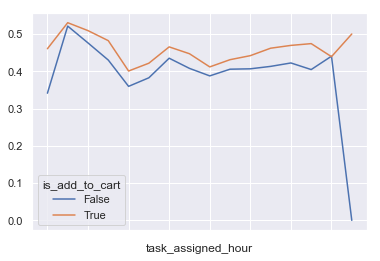

In [90]:
temp.plot()